# Unsupervised Learning Techniques — Chapter 9 (Hands-On Machine Learning)

## Overview

In this notebook, I study and apply the concepts from **Chapter 9: Unsupervised Learning Techniques** of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*.

This chapter focuses on learning from **unlabeled data**, where the goal is not to predict predefined targets, but to **discover structure, patterns, and regularities** in the data.  
The notebook is organized into two complementary parts that combine theory and practice.

---

## Part 1 — Conceptual Understanding

In the first part of the notebook, I provide structured and carefully reasoned answers to the end-of-chapter questions from Chapter 9.

These answers are written to demonstrate a clear understanding of the **goals, assumptions, strengths, and limitations** of unsupervised learning methods discussed in the book, including:

- The definition and objectives of clustering
- Common applications of clustering algorithms
- k-means clustering and its limitations
- Techniques for selecting the number of clusters
- Density-based clustering methods such as DBSCAN
- Gaussian Mixture Models and soft clustering
- Anomaly detection vs novelty detection
- Semi-supervised learning and label propagation
- Active learning and its practical motivation

The emphasis is on *why* these methods work, *when* they should be used, and *what trade-offs* they involve, rather than on implementation details alone.

---

## Part 2 — Practical Experiments and Applications

In the second part of the notebook, I apply the unsupervised learning techniques from Chapter 9 to real datasets, following a consistent experimental workflow.

Depending on the task, this includes:

- Clustering data using **k-means**, **DBSCAN**, and **Gaussian Mixture Models**
- Evaluating clustering results using appropriate metrics and visualizations
- Using clustering for **dimensionality reduction and feature engineering**
- Applying **Gaussian Mixture Models** and other methods for anomaly detection
- Exploring **semi-supervised learning** by combining clustering with supervised models
- Analyzing how hyperparameters influence the behavior and outcomes of each algorithm

Each experiment is designed to connect theory with practice and to highlight both successful use cases and common failure modes.

---

## Goal of This Notebook

The goal of this notebook is to build a **practical, coding-oriented understanding of unsupervised learning**, grounded in the theoretical discussion of Chapter 9.

Rather than treating unsupervised algorithms as black boxes, this notebook aims to show:

- How different algorithms interpret “similarity” in different ways
- Why no single unsupervised method works best for all datasets
- How unsupervised learning can support downstream tasks such as classification, anomaly detection, and data exploration

This reflects the central message of Chapter 9:  
**Unsupervised learning is not about finding a single “correct” answer, but about choosing the right assumptions and tools to reveal useful structure in data.**

**Note:**  
This notebook contains explanations in both English and Russian.
This is intentional and does not affect the code or results.

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import (
    make_blobs,
    make_moons,
    load_digits,
    fetch_olivetti_faces
)

from sklearn.cluster import (
    KMeans,
    MiniBatchKMeans,
    DBSCAN,
    MeanShift,
    estimate_bandwidth,
    Birch
)

from sklearn.mixture import (
    GaussianMixture,
    BayesianGaussianMixture
)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    confusion_matrix,
    classification_report
)

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LogisticRegression

from sklearn.semi_supervised import (
    LabelPropagation,
    LabelSpreading
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score
)

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## 1️⃣. How would you define clustering? Can you name a few clustering algorithms?

---

### 1️⃣ Explain the Meaning of the Question

This question asks for two things:

1. A **clear definition of clustering** as an unsupervised learning task.
2. Examples of **well-known clustering algorithms**, demonstrating awareness that clustering can be approached in multiple ways, based on different assumptions about the data.

The key subtlety is that clustering has **no ground-truth labels**, so the definition must emphasize *similarity* and *structure discovery*, not prediction accuracy.

---

### 2️⃣ Core Idea / Short Answer

**Clustering** is an unsupervised learning technique whose goal is to group similar instances together so that instances within the same group are more similar to each other than to instances in other groups.

Common clustering algorithms include **k-means**, **DBSCAN**, **Gaussian Mixture Models**, **Agglomerative (hierarchical) clustering**, and **Mean-Shift**.

---

### 3️⃣ Detailed Explanation

In clustering, the dataset consists only of input features \( X \), with **no target labels**.  
The algorithm’s task is to discover **structure** in the data by grouping instances according to a notion of similarity.

What “similar” means depends on the algorithm:

- **Distance-based clustering**  
  - Example: **k-means**  
  - Assumes clusters are roughly spherical and of similar size  
  - Groups points by minimizing distances to cluster centroids

- **Density-based clustering**  
  - Example: **DBSCAN**  
  - Defines clusters as regions of high point density  
  - Can detect outliers and find clusters of arbitrary shape

- **Probabilistic clustering**  
  - Example: **Gaussian Mixture Models (GMMs)**  
  - Assumes data is generated by a mixture of probability distributions  
  - Allows soft (probabilistic) cluster assignments

- **Hierarchical clustering**  
  - Example: **Agglomerative clustering**  
  - Builds a hierarchy of clusters, from individual points up to one global cluster

- **Mode-seeking clustering**  
  - Example: **Mean-Shift**  
  - Finds clusters by locating high-density regions (modes) in the data distribution

Because clustering is unsupervised, **there is no single “correct” clustering**.  
Different algorithms may produce different results on the same dataset, depending on their assumptions and hyperparameters.

---

### 4️⃣ Edge Cases / Common Misconceptions

- **Clusters are not always well-defined**  
  Some datasets do not have a clear cluster structure, even though algorithms will still produce clusters.

- **Clusters are not classes**  
  Clustering does not discover semantic labels automatically; clusters may or may not correspond to meaningful real-world categories.

- **No universal clustering algorithm exists**  
  An algorithm that works well for spherical clusters may fail completely on curved or unevenly dense clusters.

---

### 5️⃣ One-Sentence Intuition

> Clustering is about discovering natural groupings in unlabeled data by defining and exploiting a notion of similarity, and different algorithms reflect different assumptions about what “similar” means.

## 2️⃣ . What are some of the main applications of clustering algorithms?

---

### 1️⃣ Explain the Meaning of the Question

This question asks you to identify **practical use cases** of clustering algorithms.  
It is not about how clustering works internally, but about **where and why clustering is used in real-world machine learning systems**.

A key point emphasized in this chapter is that clustering is often **not an end goal**, but rather a **supporting technique** that helps understand data, preprocess it, or improve downstream tasks.

---

### 2️⃣ Core Idea / Short Answer

Clustering algorithms are mainly used for **data exploration, segmentation, feature engineering, anomaly detection, dimensionality reduction, recommender systems, and semi-supervised learning**.

---

### 3️⃣ Detailed Explanation

Some of the most common applications of clustering algorithms include:

- **Data analysis and exploration**  
  Clustering helps uncover hidden structure in unlabeled data by grouping similar instances together, making large datasets easier to understand and analyze.

- **Customer or user segmentation**  
  In business and marketing, clustering is used to group customers based on behavior, preferences, or purchasing patterns, enabling targeted and personalized strategies.

- **Recommender systems**  
  Users or items can be clustered so that recommendations are based on preferences of similar users or similarities between items, reducing problem complexity.

- **Dimensionality reduction and feature engineering**  
  Cluster assignments, distances to cluster centers, or cluster membership probabilities can be used as new features, helping reduce dimensionality or enrich representations for supervised models.

- **Anomaly and outlier detection**  
  Instances that do not belong to any cluster or lie in low-density regions are often considered anomalies, which is useful in fraud detection, defect detection, and data cleaning.

- **Semi-supervised learning**  
  When only a few labeled instances are available, clustering can be used to group data and propagate labels within clusters, significantly reducing labeling effort.

- **Image and signal processing**  
  Clustering is used for tasks such as image segmentation, audio segmentation, and medical imaging, where the goal is to group similar pixels or signal components.

---

### 4️⃣ Edge Cases / Common Misconceptions

- **Clustering does not guarantee meaningful groups**  
  Algorithms will always produce clusters, even when no real structure exists in the data.

- **Clusters are not necessarily classes**  
  Clusters may not correspond to semantic categories or labels, especially in complex real-world data.

- **No single clustering method fits all problems**  
  Different applications require different assumptions about similarity, density, or data geometry.

---

### 5️⃣ One-Sentence Intuition

> Clustering algorithms are primarily used to discover structure in unlabeled data and to support tasks such as segmentation, anomaly detection, feature engineering, and semi-supervised learning.

## 3️⃣ **“Describe two techniques to select the right number of clusters when using k-means.”**  
is asking **how we choose the hyperparameter `k`**, which is one of the biggest weaknesses of k-means.

The important idea from Chapter 8 is this:

> **k-means will always produce exactly `k` clusters, even if `k` is wrong.**  
So choosing `k` is not optional — it is a modeling decision that must be justified.

The book focuses on **two practical and widely used techniques**.

---

## Technique 1: The Elbow Method (using inertia)

### Core idea

k-means tries to minimize **inertia**, which is the sum of squared distances between each point and its closest centroid.

- As `k` increases:
  - clusters become smaller
  - points are closer to centroids
  - inertia **always decreases**

So inertia alone cannot tell us the correct `k`.

---

### How the elbow method works

1. Train k-means for several values of `k` (e.g., 1 to 10)
2. Compute inertia for each `k`
3. Plot inertia vs `k`
4. Look for a point where the decrease in inertia **slows down sharply**

That point is called the **elbow**.

---

### Intuition

- Before the elbow: adding clusters helps a lot
- After the elbow: adding clusters gives diminishing returns

So the elbow represents a **reasonable trade-off** between model simplicity and fit quality.

---

### Limitations

- The elbow is sometimes **not clear**
- It is a **heuristic**, not a strict rule
- Works best when clusters are well separated and roughly spherical

---

## Technique 2: The Silhouette Score

### Core idea

The silhouette score measures **how well each point fits within its cluster compared to other clusters**.

For each point, it compares:
- how close it is to points in its own cluster
- how close it is to points in the nearest neighboring cluster

The score ranges from:
- **–1** (very bad clustering)
- to **+1** (very good clustering)

---

### How it is used to select `k`

1. Train k-means for several values of `k`
2. Compute the average silhouette score for each `k`
3. Choose the `k` that **maximizes the silhouette score**

---

### Intuition

- High silhouette score:
  - clusters are compact
  - clusters are well separated
- Low silhouette score:
  - clusters overlap
  - or points are near cluster boundaries

---

### Limitations

- Computationally more expensive than inertia
- Still relies on distance assumptions
- Can favor slightly smaller `k` values

---

## Key comparison (conceptual)

- **Elbow method**  
  → focuses on *how much variance is explained*  
- **Silhouette score**  
  → focuses on *how well clusters are separated*

The book recommends using **both together**, not relying on a single metric.

---

### One-sentence intuition

Choosing `k` in k-means is done by balancing compactness and separation, commonly using the elbow method (inertia) and the silhouette score to find a reasonable trade-off.

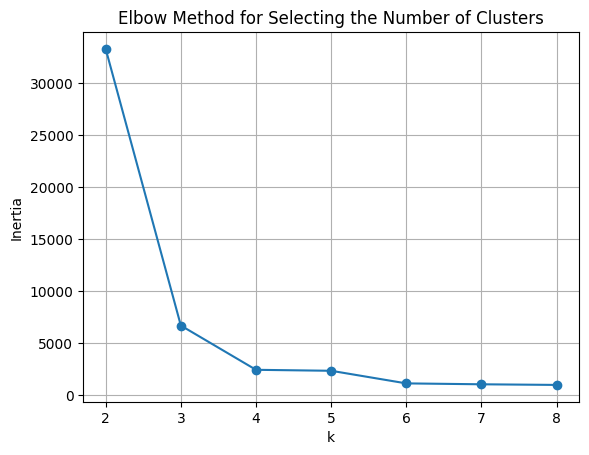

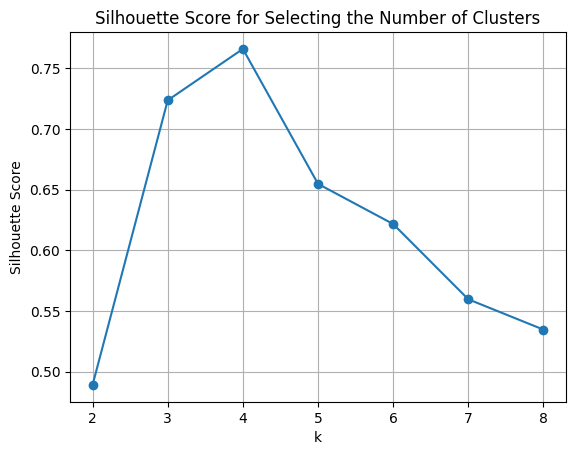

In [70]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Generate synthetic data
X, _ = make_blobs(
    n_samples=1000,
    centers=5,
    cluster_std=0.8,
    random_state=RANDOM_STATE
)

# Range of k values to test
k_values = range(2, 9)

inertias = []
silhouette_scores = []

# Fit k-means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot 1 Elbow Method
plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method for Selecting the Number of Clusters")
plt.grid(True)
plt.show()

# Plot 2 Silhouette Score
plt.figure()
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Selecting the Number of Clusters")
plt.grid(True)
plt.show()

## 4️⃣ What is label propagation? Why would you implement it, and how?

Label propagation is a **semi-supervised learning** technique. The idea is: if you only have a small number of labeled examples but many unlabeled ones, you can **spread (propagate)** the labels from the labeled points to nearby/similar unlabeled points.

### What the question is really asking
It asks you to explain three things:
1) **What it is** (definition)  
2) **Why you would use it** (motivation and benefit)  
3) **How you do it in practice** (workflow/implementation)

---

## 1) What is label propagation?
Label propagation means:

> Use the structure of the unlabeled data (similarity or clusters) to assign labels to unlabeled instances based on a small set of labeled instances.

So instead of labeling thousands of points manually, you label a few “anchor” points and let the algorithm assign labels to the rest.

---

## 2) Why would you implement it?
You implement it when:
- labeling is expensive (requires human experts)
- you have plenty of unlabeled data
- the data forms meaningful groups (clusters/manifolds)

### The benefit
- You can train a supervised model on a **much larger labeled dataset** without paying for all labels.
- It often boosts accuracy compared to training on the small labeled set alone.

In the book’s digits example:
- labeling 50 representative images gives a decent boost
- propagating labels to their clusters boosts performance even more

---

## 3) How would you implement it? (two practical ways)

### A) Clustering-based label propagation (the chapter’s main approach)
This is what the book demonstrates with k-means:

**Workflow**
1. Cluster the data (e.g., k-means)
2. Pick one representative point per cluster (closest to centroid)
3. Manually label only these representatives
4. Propagate that label to the rest of the cluster
5. Optionally keep only points close to the centroid (to reduce wrong labels)
6. Train a supervised model (logistic regression, etc.) on the propagated labels

**Why this works**
- points in the same cluster are usually similar
- so they likely share the same class

---

### B) Graph-based label propagation (LabelPropagation / LabelSpreading in sklearn)
This approach builds a similarity graph between all points:

**Workflow**
1. Build a graph where edges connect similar points
2. Fix the labels for the labeled points
3. Iteratively spread labels through the graph until stable

This is useful when clusters are not clean blobs but lie on a manifold.

---

## Key limitations (important to mention)
- If clusters mix multiple classes → propagation spreads wrong labels
- Outliers and boundary points are risky (that’s why the book drops farthest points)
- It depends heavily on the quality of the similarity measure (distance metric, scaling)

---

### One-sentence intuition
Label propagation reduces labeling cost by assuming that **nearby or similarly grouped points should share the same label**, then using that assumption to label unlabeled data automatically.

## Using Clustering for Semi-Supervised Learing
Another use case for clustering is semi-supervised learngin,when u have plently of unlabeled instances and very few labeled instances 
Lets tackle the digits dataaset which is a simple MNIST-like dataset  containing 1,797 grayscale 8x8 images represetning digits 0 to 9

In [71]:
X_digits, y_digits  = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400] 
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [72]:
# lets look at the performance of a logistic regression model when we only have 50 labaled instances:

n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test) # The .score() method does two steps at once internally, predicts and evaluates

0.7581863979848866

In [73]:
# Lets try to mesure the accuracy when we use whole training set

log_reg_full = LogisticRegression(max_iter=10000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

The performance much lowet when training on just 50 random images.Lets see how can we do better.First lets cluster the trainin set into 50 clusters, then for each cluster lets find the image closest to the centroid.We call these images representive images.

In [74]:
k = 50 # we will group our data into 50 clusters 

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) 
representative_digit_idx = X_digits_dist.argmin(axis=0) # This line asks for each cluster, which data point is closest to that cluster center so it returns the index of that closest point 
X_representative_digits = X_train[representative_digit_idx] # This line uses those indexes to get the actual data points

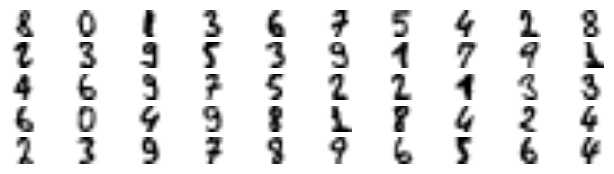

In [75]:
# extra code – this cell generates Figure 8–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')


plt.show()


In [76]:
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

In [77]:
# We have a dataset with just 50 labeled instances, but instead of being completely random instances, each of tham is a representative images of its cluster. 
# Lets see if the perfprmence is any better

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8312342569269522

Wow! We jumped from 75.8% accuracy to 83.1%, You first trained a model on the full dataset, which contained noisy, ambiguous, and redundant samples. Then you used K-Means to pick 50 representative images and manually labeled them. These representative samples were cleaner and more informative, so when training a second model on just those 50 examples, the accuracy improved. The first model struggled with noisy data; the second learned from clean, typical examples.

Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

Propagate = spread one label to many samples automatically assign it to all other samples in that same cluster. 

In [78]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)  # this creates an empty array to store labels for every sample in the training set, all values will be filled in the next lines of code 
for i in range(k): 
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i] # kmeans.label_  tells you which cluster that sample belongs to 

In [79]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8664987405541562

We got another significant accuracy boost! Let's see if we can do even better by ignoring the 50% instances that are farthest from their cluster center: this should eliminate most outliers:

In [80]:
percentile_closest = 50  # keep the closest 50% of samples inside each cluster

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]  # this creates a distance vector, where: X_cluster_dist[i] = distance from sample i to its assigned cluster center
for i in range(k):
    in_cluster = (kmeans.labels_ == i) # select sampples inside the cluster
    cluster_dist = X_cluster_dist[in_cluster] # get their distances 
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # So for 50% percentile: keeps the “inner” half (closest samples) and removes outliers
    above_cutoff = (X_cluster_dist > cutoff_distance) # mark samples above the cutoff
    X_cluster_dist[in_cluster & above_cutoff] = -1 # reject outliers, close smaples keep, far samples set to -1 meaning dont propagate 

partially_propagated = (X_cluster_dist != -1) # boolean mask for kept samples, True = close enough, False = outliers
X_train_partially_propagated = X_train[partially_propagated] 
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [81]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test) 

0.8790931989924433

Wow, another accuracy boost!

Our propagated labels are actually pretty good: their accuracy is about 98.9%:

In [82]:
(y_train_partially_propagated == y_train[partially_propagated]).mean() 

np.float64(0.9887640449438202)

### Semi-Supervised Label Propagation Summary

We started with only 50 manually labeled representative samples obtained using K-Means clustering (one representative per cluster). Instead of randomly choosing examples, clustering provided diverse and clean prototype digits. We then propagated the representative labels to other samples within the same cluster and used a percentile-based distance cutoff to only keep the closest (and most reliable) instances for training. 

This semi-supervised approach effectively expanded a small, high-quality labeled set into a larger labeled subset while filtering out noisy or ambiguous samples. Training a classifier on the partially propagated labels reached an accuracy of ~87%, showing that a small amount of manual labeling combined with clustering and confidence filtering can outperform naive labeling and reduce the need for large manually labeled datasets.

## 5️⃣ Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

This question evaluates whether I understand that **clustering algorithms differ fundamentally in their design goals**, especially regarding:

- **Scalability**: how well they handle large numbers of samples
- **Cluster definition**: whether clusters are defined by distance, hierarchy, or density

The key idea is that no single clustering algorithm is optimal for all scenarios; instead, each makes specific assumptions and trade-offs.

---

## A) Two clustering algorithms that can scale to large datasets

### 1️⃣ k-means (and MiniBatch k-means)

**How it works**
- k-means represents each cluster by a **centroid**
- At each iteration:
  1. Each point is assigned to the nearest centroid
  2. Each centroid is updated as the mean of its assigned points
- The process repeats until centroids stabilize

**Why it scales well**
- Distance computations are simple and efficient
- Time complexity grows roughly linearly with:
  - number of samples
  - number of clusters
  - number of features
- Memory usage is low since only centroids need to be stored

**MiniBatch k-means**
- Uses small random subsets (mini-batches) instead of the full dataset
- Greatly reduces computation time
- Trades a small amount of accuracy for much better scalability

**Limitations**
- Assumes clusters are roughly spherical and of similar size
- Requires specifying the number of clusters in advance
- Sensitive to outliers

---

### 2️⃣ BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

**How it works**
- BIRCH builds a **Clustering Feature (CF) tree**, which summarizes the dataset incrementally
- Each node stores compact statistics (count, linear sum, squared sum)
- Data points are absorbed into the tree instead of being stored individually

**Why it scales well**
- Designed specifically for very large datasets
- Works in a single pass over the data
- Uses limited memory
- Can handle data that does not fit entirely in RAM

**Limitations**
- Assumes clusters are reasonably compact
- Final clustering quality depends on CF-tree parameters
- Less flexible for arbitrary-shaped clusters

---

## B) Two clustering algorithms that look for regions of high density

### 1️⃣ DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**How it works**
- Defines clusters as **regions of high point density**
- Uses two parameters:
  - `eps`: neighborhood radius
  - `min_samples`: minimum points required to form a dense region
- Core points form clusters; sparse points are labeled as noise

**Why it is density-based**
- Clusters are not defined by centroids
- Arbitrary shapes are supported
- Naturally identifies outliers as points in low-density regions

**Limitations**
- Does not scale well to very large datasets
- Struggles when cluster densities vary significantly
- Sensitive to choice of `eps`

---

### 2️⃣ Mean-Shift

**How it works**
- Treats data as samples from a continuous density function
- Places a window (kernel) around each point
- Iteratively shifts the window toward higher-density regions
- Each density maximum (mode) becomes a cluster center

**Why it is density-based**
- Clusters correspond to **modes of the density function**
- No need to specify the number of clusters in advance

**Limitations**
- Computationally expensive
- Does not scale well to large datasets
- Sensitive to bandwidth selection

---

## Key Trade-off Summary

- **Scalable algorithms** (k-means, MiniBatch k-means, BIRCH):
  - Efficient on large datasets
  - Require stronger assumptions about cluster shape
  - Often need the number of clusters in advance

- **Density-based algorithms** (DBSCAN, Mean-Shift):
  - Flexible cluster shapes
  - Automatic outlier detection
  - Poor scalability and sensitive hyperparameters

---

### One-sentence intuition

Some clustering algorithms scale well by simplifying cluster structure and using efficient approximations (such as k-means and BIRCH), while density-based methods (such as DBSCAN and Mean-Shift) focus on discovering dense regions in the data, trading scalability for flexibility.

In [83]:
# 1) Scalable clustering demo (KMeans / MiniBatchKMeans / BIRCH)

X_blobs, _ = make_blobs(
    n_samples=8000,
    centers=5, 	# number of true cluster centers
    cluster_std=0.9, # controls how spread out each blob is around its center.
    random_state=RANDOM_STATE
)

scaler = StandardScaler() # If you don’t scale the data, features with larger numeric ranges dominate distance calculations, which can completely distort clustering results.
X_blobs_scaled = scaler.fit_transform(X_blobs) 

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
mbk = MiniBatchKMeans(n_clusters=5, batch_size=1024, random_state=RANDOM_STATE)
birch = Birch(n_clusters=5)

labels_kmeans = kmeans.fit_predict(X_blobs_scaled)
labels_mbk = mbk.fit_predict(X_blobs_scaled)
labels_birch = birch.fit_predict(X_blobs_scaled)

In [84]:
idx = np.random.choice(len(X_blobs_scaled), size=1500, replace=False)
# select a random subset of points from the dataset for visualization only, plotting all of the 8000 points make the plot messy, replace=False means no duplicatesabs
idx[:10] # meaning pick rows 6716, 1148, 2340, 1844, 7375, 2085, 6082, 3925, 6878, 2005 ....

array([2215, 2582, 1662, 3027, 4343, 2680, 1765, 1123, 4054, 3761])

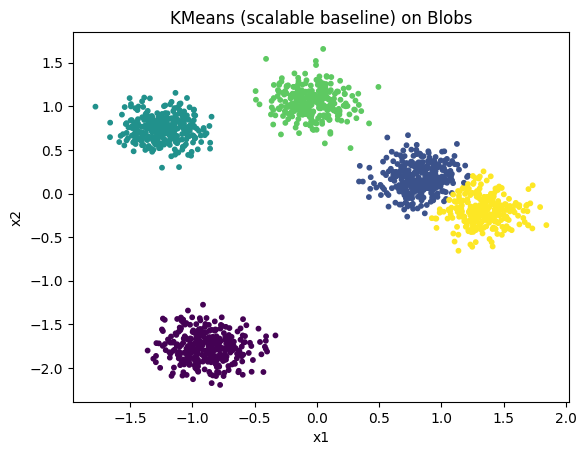

In [85]:
plt.figure()
plt.scatter(
    X_blobs_scaled[idx, 0], # first feature, x-axis
    X_blobs_scaled[idx, 1], # second feature, y-axis
    c=labels_kmeans[idx], # color each point according to the cluster k-means assigned it to.
    s=10 #size of each point
) 
plt.title("KMeans (scalable baseline) on Blobs")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()  

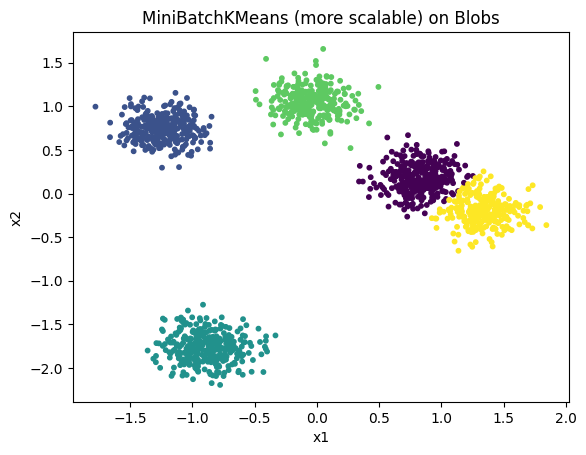

In [86]:
plt.figure()
plt.scatter(X_blobs_scaled[idx, 0], X_blobs_scaled[idx, 1], c=labels_mbk[idx], s=10)
plt.title("MiniBatchKMeans (more scalable) on Blobs")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()  

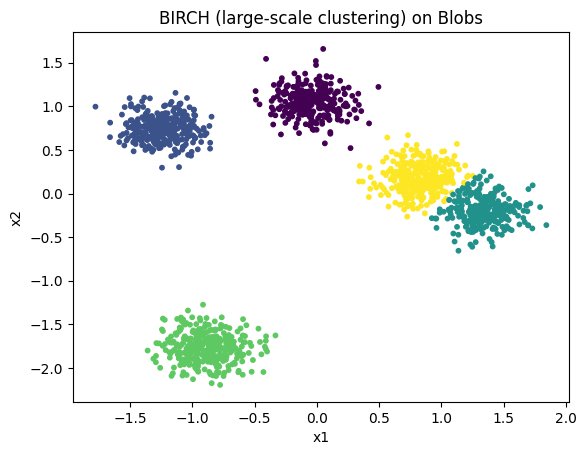

In [87]:
plt.figure()
plt.scatter(X_blobs_scaled[idx, 0], X_blobs_scaled[idx, 1], c=labels_birch[idx], s=10)
plt.title("BIRCH (large-scale clustering) on Blobs")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()  

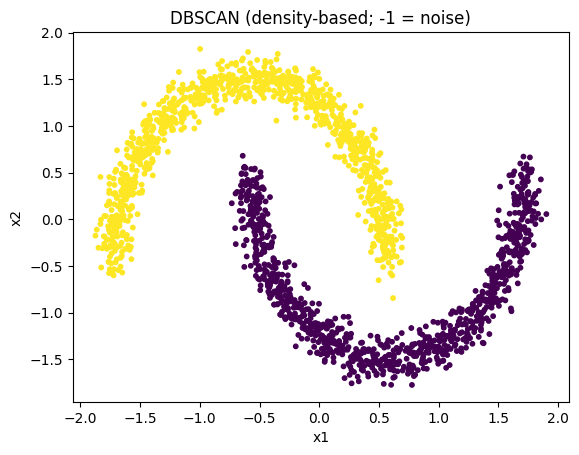

In [88]:
# 2) Density-based clustering demo (DBSCAN / MeanShift)
X_moons, _ = make_moons(n_samples=2000, noise=0.06, random_state=RANDOM_STATE)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# DBSCAN: eps and min_samples control density definition
dbscan = DBSCAN(eps=0.25, min_samples=10)
labels_db = dbscan.fit_predict(X_moons_scaled)

plt.figure()
plt.scatter(
    X_moons_scaled[:, 0], # all first-feature values
    X_moons_scaled[:, 1], # all second-feature values
    c=labels_db, # cluster labels from DBSCAN
    s=10)

plt.title("DBSCAN (density-based; -1 = noise)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()  

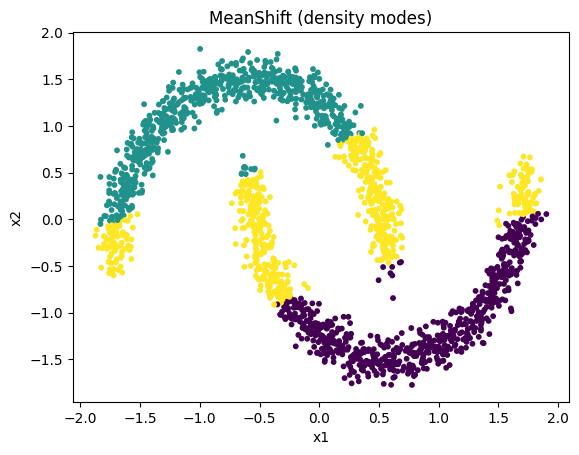

In [89]:
# MeanShift: bandwidth controls neighborhood size (density smoothing)
bandwidth = estimate_bandwidth(X_moons_scaled, quantile=0.2, n_samples=500, random_state=RANDOM_STATE)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels_ms = meanshift.fit_predict(X_moons_scaled)

plt.figure()
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=labels_ms, s=10)
plt.title("MeanShift (density modes)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()   

This is bad clustering for the two-moons dataset.
MeanShift is breaking each moon into several pieces instead of recovering the two true curved clusters.

In [90]:
print("DBSCAN clusters (excluding noise):", len(set(labels_db)) - (1 if -1 in labels_db else 0))
print("DBSCAN noise points:", np.sum(labels_db == -1))
print("MeanShift clusters:", len(set(labels_ms)))  

DBSCAN clusters (excluding noise): 2
DBSCAN noise points: 0
MeanShift clusters: 3


### Clustering Practice Summary

We compared several clustering algorithms on synthetic datasets to observe how different methods behave under different data geometries and scalability needs.

**K-Means** and **MiniBatch K-Means** performed well on blob-shaped clusters and MiniBatch offered faster, more scalable computation with similar results. **BIRCH** also recovered blob clusters effectively and is suitable for larger datasets.

On the two-moons dataset, **DBSCAN** successfully identified the non-linear curved clusters and handled noise points correctly. **MeanShift** struggled on this dataset, splitting each curved structure into multiple pieces due to its density mode estimation.

Overall, results highlight that no single clustering algorithm works best in all cases:  
- Centroid-based methods (K-Means, MiniBatch, BIRCH) work well for convex blob-like clusters.  
- Density-based methods (DBSCAN, MeanShift) are better for irregular, non-convex shapes but differ in robustness.  
- Scalability also varies across methods, with MiniBatch K-Means and BIRCH being more suitable for large datasets.